## EDA

## Data Prepocessing Before Building Machine Leraning Model

## Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read The Dataset

In [2]:
df=pd.read_csv('used_cars_data.csv')

In [3]:
df.head(4)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [4]:
df.tail(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


## sanity check for data

In [5]:
df.shape

(7253, 14)

In [6]:
df.size

101542

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
# finding the missing value
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [9]:
# finding the missing value percentage
df.isnull().sum()/df.shape[0]*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [10]:
#finding duplicate
df.duplicated().sum()

np.int64(0)

In [11]:
#identifying garbage value"
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("***"*10)

Name
Mahindra XUV500 W8 2WD                   55
Maruti Swift VDI                         49
Maruti Swift Dzire VDI                   42
Honda City 1.5 S MT                      39
Maruti Swift VDI BSIV                    37
                                         ..
Mercedes-Benz E-Class E240 V6 AT          1
Nissan Terrano XE 85 PS                   1
Mahindra TUV 300 2015-2019 T8 AMT         1
Hyundai i20 2015-2017 1.4 CRDi Sportz     1
Hyundai Creta 1.6 VTVT Base               1
Name: count, Length: 2041, dtype: int64
******************************
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
******************************
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
******************************
Transmission
Manual     

## Exploratory Data Analysis 

In [12]:
# descriptive statistics
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [13]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,7253,7253,7253,7253,7253,7251,7207,7207,1006
unique,2041,11,5,2,4,450,150,386,625
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,55,949,3852,5204,5952,207,732,280,6


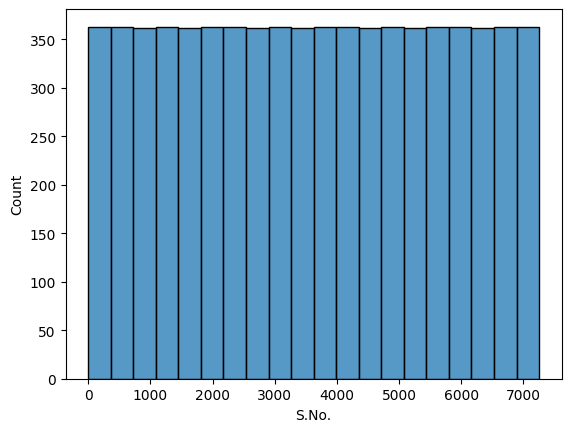

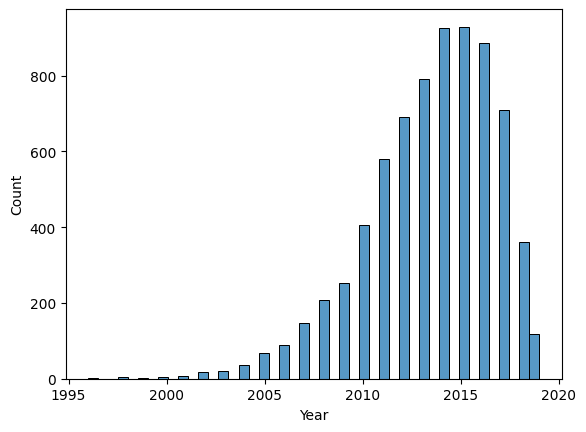

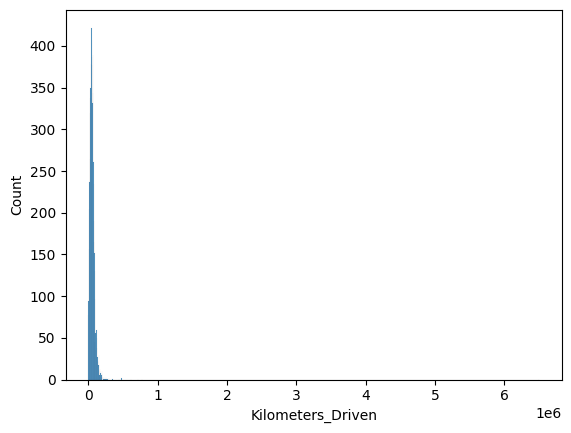

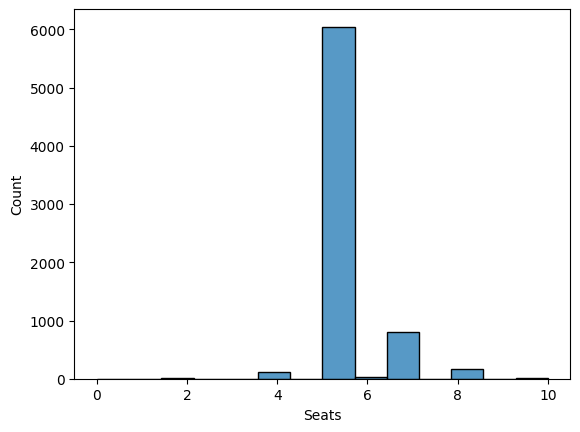

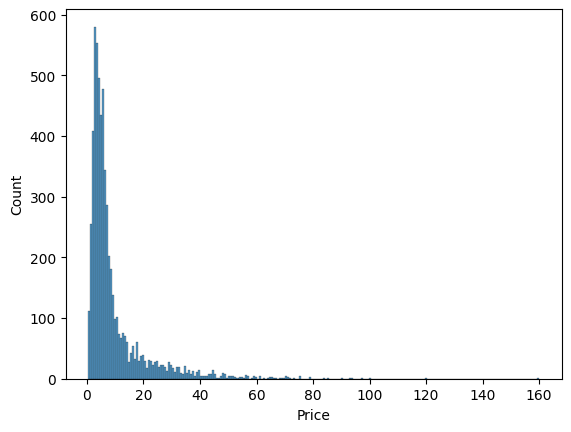

In [14]:
#Histogram to understand the distribution
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

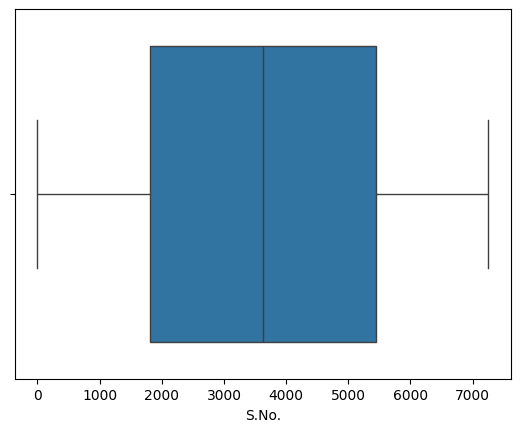

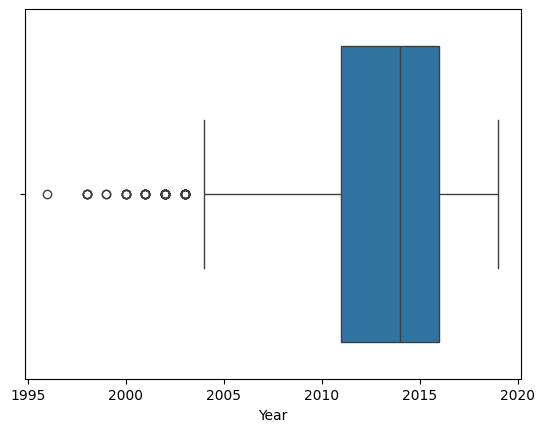

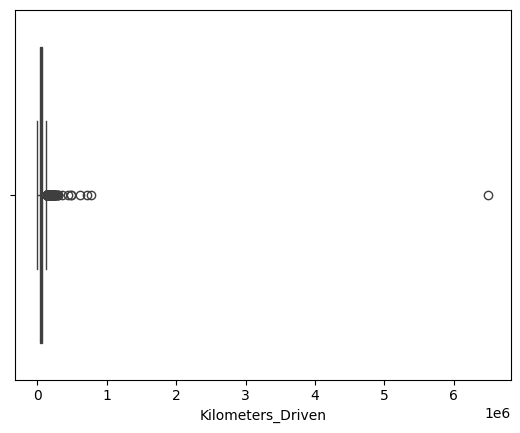

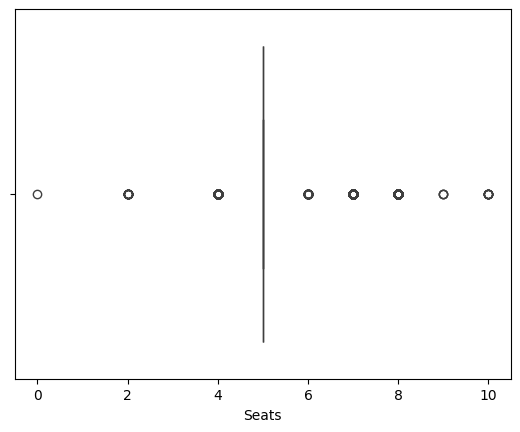

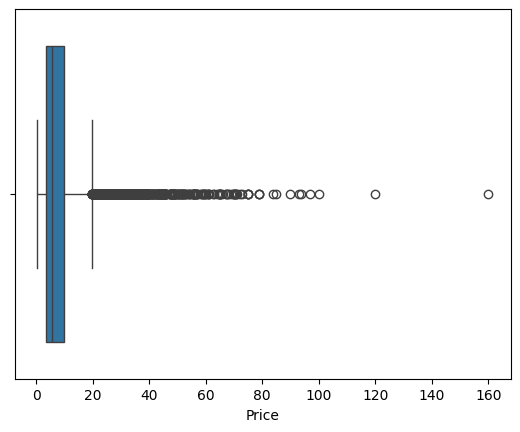

In [15]:
# boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [16]:
df.head(4)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


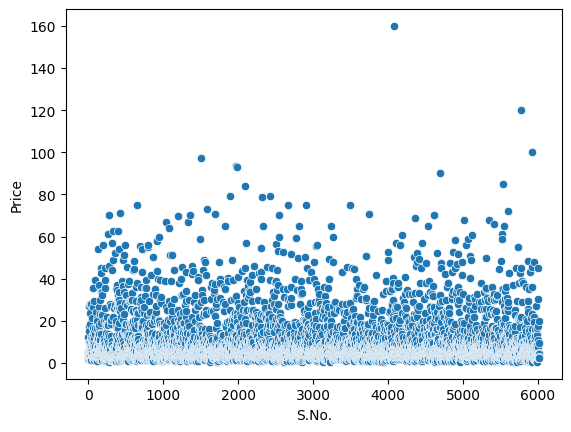

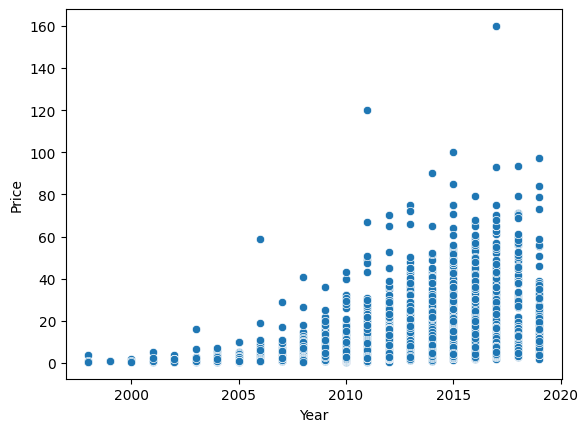

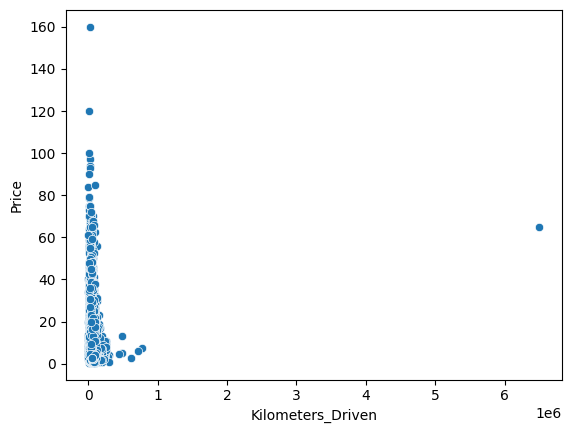

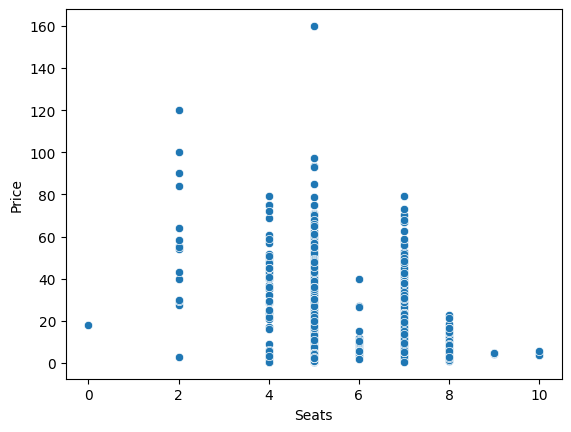

In [17]:
#scatter plot to understand the relationship
for i in ['S.No.', 'Year', 'Kilometers_Driven', 'Seats']:
    sns.scatterplot(data=df,x=i,y='Price')
    plt.show()

In [18]:
df.select_dtypes(include="number").columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

In [19]:
##corelation between data using heatmap
s=df.select_dtypes(include="number").corr()

<Axes: >

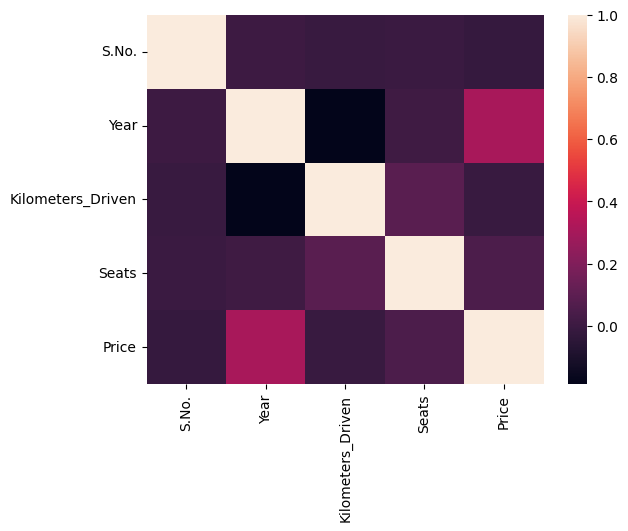

In [20]:
sns.heatmap(s)

In [21]:
s

,S.No.,Year,Kilometers_Driven,Seats,Price
S.No.,1.000000,0.005573,-0.007697,-0.006720,-0.020275
Year,0.005573,1.000000,-0.187859,0.008216,0.305327
Kilometers_Driven,-0.007697,-0.187859,1.000000,0.090221,-0.011493
Seats,-0.006720,0.008216,0.090221,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


In [22]:
# choose the method of imputing missing value 
#like mean mode median or knnputer

In [23]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [24]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [25]:
for i in ['Mileage','Engine','Power','Seats','New_Price']:
    df[i].fillna(df[i].median(),inplace=True)

TypeError: Cannot convert ['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' ... '23.08 kmpl' '17.2 kmpl'
 '10.0 kmpl'] to numeric

In [ ]:
from sklearn.impute import KNNImputer
impute=KNNInputer()
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

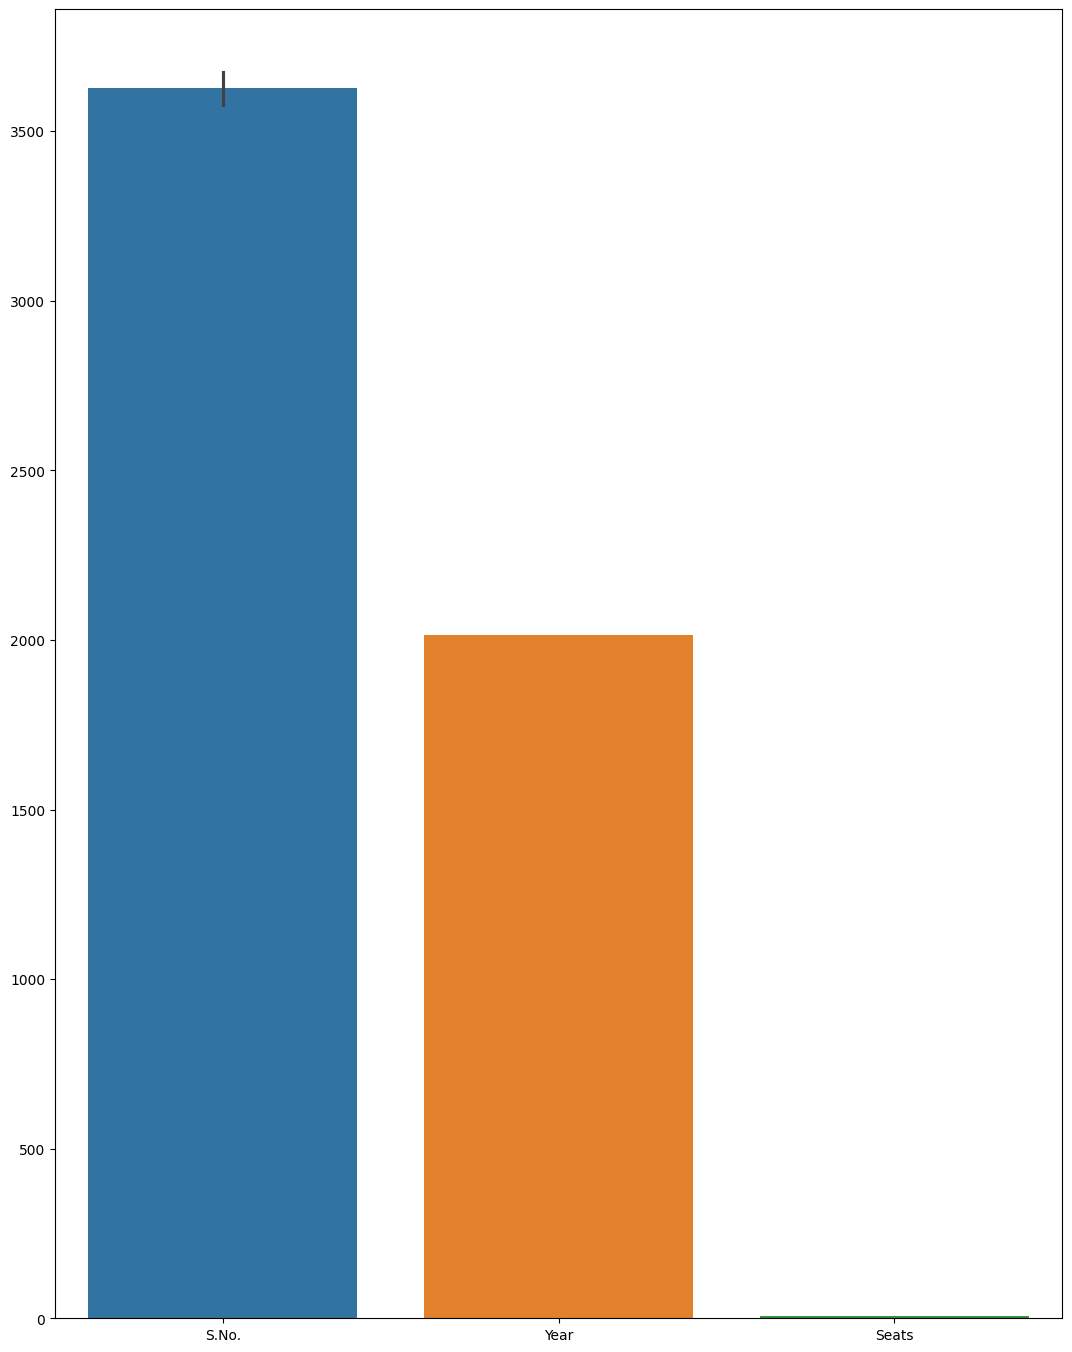

In [27]:
plt.figure(figsize=(13,17))
sns.barplot()
plt.show()

In [28]:
df.head(4)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


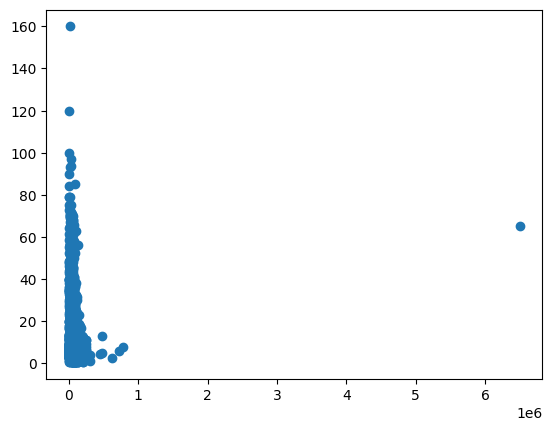

In [31]:
plt.scatter(df['Kilometers_Driven'],df['Price'])
plt.show()

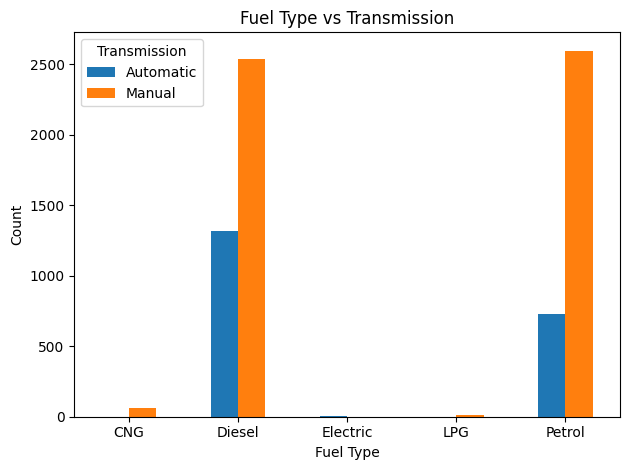

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("used_cars_data.csv")

# Create counts
counts = pd.crosstab(df['Fuel_Type'], df['Transmission'])

# Plot
counts.plot(kind='bar')
plt.title("Fuel Type vs Transmission")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Transmission")
plt.tight_layout()
plt.show()
